Found 50 entries for w_learning_rate = 0.005 in ER
Minimum lam_h for ER: 1e-05
Maximum lam_h for ER: 100000000.0
Minimum lam_l1 for ER: 1e-08
Maximum lam_l1 for ER: 100000000.0
Minimum SHD for ER: 1578.0
Maximum SHD for ER: 15656.0
Minimum log10(lam_h) for ER: -5.0
Maximum log10(lam_h) for ER: 8.0
Minimum log10(lam_l1) for ER: -8.0
Maximum log10(lam_l1) for ER: 8.0
Figure saved as /users-2/amine/pcax24/examples/experiments/ER_SHD_surface_plot.png


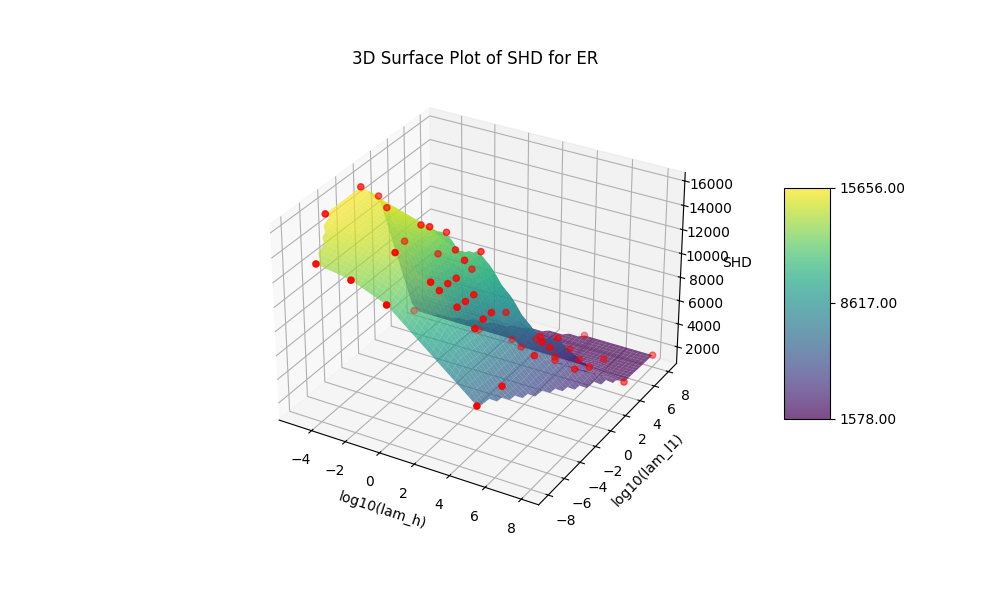

Figure saved as /users-2/amine/pcax24/examples/experiments/ER_SHD_scatter_plots.png


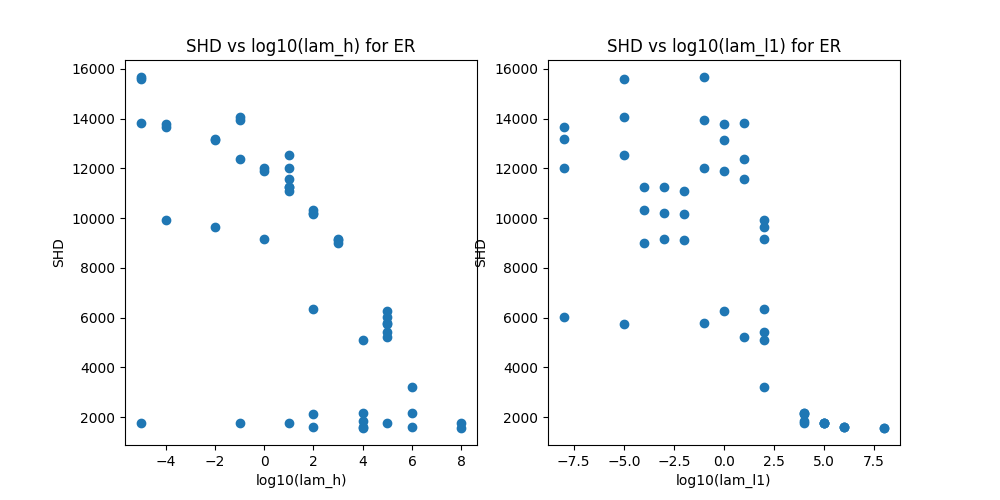

Found 41 entries for w_learning_rate = 0.005 in SF
Minimum lam_h for SF: 1e-05
Maximum lam_h for SF: 100000000.0
Minimum lam_l1 for SF: 1e-05
Maximum lam_l1 for SF: 1000000.0
Minimum SHD for SF: 231.0
Maximum SHD for SF: 8381.0
Minimum log10(lam_h) for SF: -5.0
Maximum log10(lam_h) for SF: 8.0
Minimum log10(lam_l1) for SF: -5.0
Maximum log10(lam_l1) for SF: 6.0
Figure saved as /users-2/amine/pcax24/examples/experiments/SF_SHD_surface_plot.png


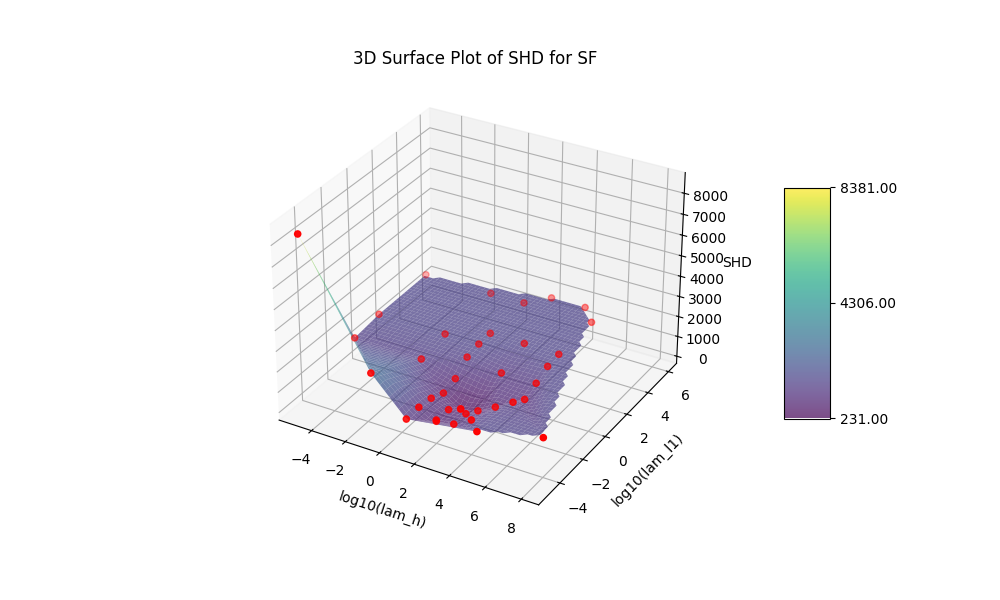

Figure saved as /users-2/amine/pcax24/examples/experiments/SF_SHD_scatter_plots.png


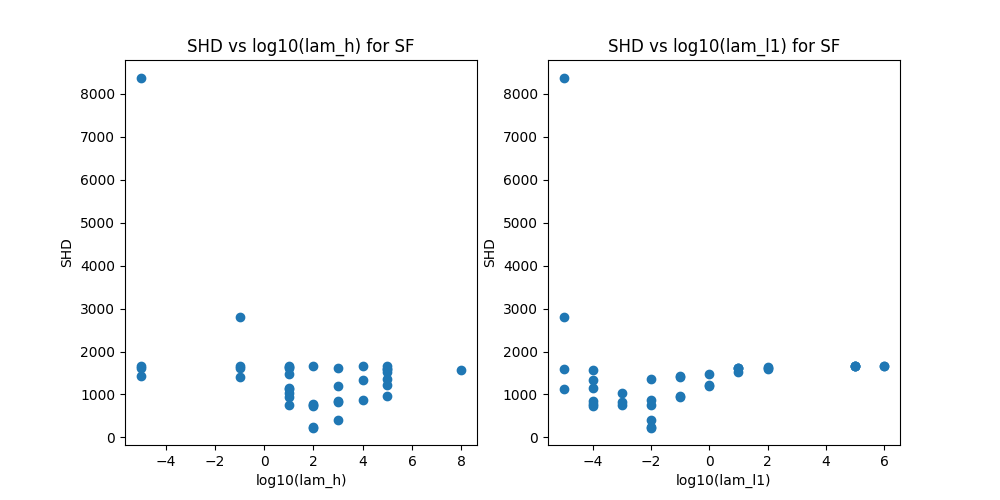

Found 46 entries for w_learning_rate = 0.005 in connectome
Minimum lam_h for connectome: 1e-05
Maximum lam_h for connectome: 100000000.0
Minimum lam_l1 for connectome: 1e-05
Maximum lam_l1 for connectome: 100000000.0
Minimum SHD for connectome: 1599.0
Maximum SHD for connectome: 9636.0
Minimum log10(lam_h) for connectome: -5.0
Maximum log10(lam_h) for connectome: 8.0
Minimum log10(lam_l1) for connectome: -5.0
Maximum log10(lam_l1) for connectome: 8.0
Figure saved as /users-2/amine/pcax24/examples/experiments/connectome_SHD_surface_plot.png


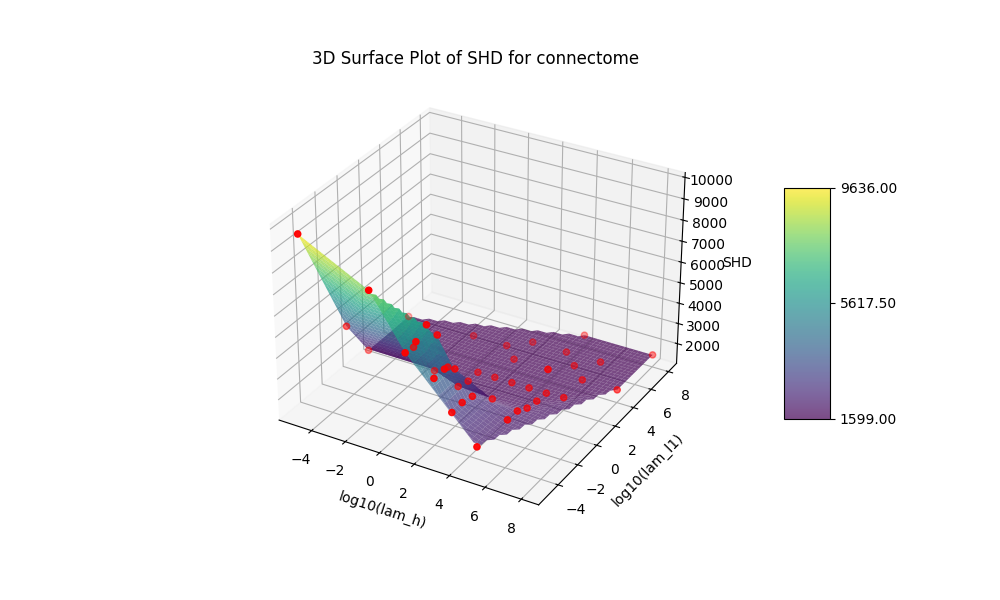

Figure saved as /users-2/amine/pcax24/examples/experiments/connectome_SHD_scatter_plots.png


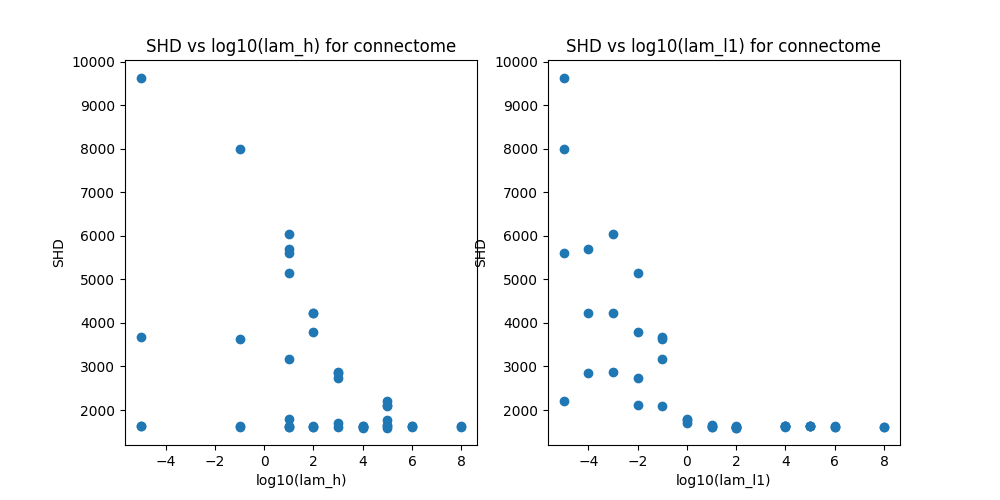

In [1]:
# Activate the interactive backend for Jupyter Notebooks
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np
import os

# Path to the experiments folder where CSV files are located
experiments_path = "/users-2/amine/pcax24/examples/experiments"

# List of CSV files corresponding to each graph type
csv_files = {
    "ER": os.path.join(experiments_path, "ER_experiments.csv"),
    "SF": os.path.join(experiments_path, "SF_experiments.csv"),
    "connectome": os.path.join(experiments_path, "connectome_experiments.csv")
}

# Iterate through each graph type and its corresponding CSV file
for graph_type, csv_file in csv_files.items():
    # Check if the CSV file exists
    if not os.path.exists(csv_file):
        print(f"CSV file for {graph_type} not found, skipping...")
        continue

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter rows where w_learning_rate is 0.005
    df_filtered = df[df['w_learning_rate'] == 0.005]

    # Print how many entries were found for w_learning_rate = 0.005 of the current graph type
    print(f"Found {len(df_filtered)} entries for w_learning_rate = 0.005 in {graph_type}")

    # Check if filtered DataFrame is not empty
    if df_filtered.empty:
        print(f"No data for w_learning_rate = 0.005 in {graph_type}, skipping...")
        continue

    # Drop rows with NaN or infinite values in relevant columns
    df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['lam_h', 'lam_l1', 'SHD'])
    df_filtered = df_filtered[(df_filtered['lam_h'] > 0) & (df_filtered['lam_l1'] > 0)]

    # Check if the filtered DataFrame is still not empty after cleaning
    if df_filtered.empty:
        print(f"No valid data after cleaning in {graph_type}, skipping...")
        continue

    # Prepare data for plotting
    lam_h = df_filtered['lam_h'].values
    lam_l1 = df_filtered['lam_l1'].values
    SHD = df_filtered['SHD'].values

    # Print the ranges of lam_h and lam_l1 to ensure they are within expected limits
    print(f"Minimum lam_h for {graph_type}: {min(lam_h)}")
    print(f"Maximum lam_h for {graph_type}: {max(lam_h)}")
    print(f"Minimum lam_l1 for {graph_type}: {min(lam_l1)}")
    print(f"Maximum lam_l1 for {graph_type}: {max(lam_l1)}")

    # Convert lam_h and lam_l1 to their base-10 logarithmic scale (log10)
    log_lam_h = np.log10(lam_h)
    log_lam_l1 = np.log10(lam_l1)

    # Print the minimum and maximum SHD values for the current graph type
    shd_min = min(SHD)
    shd_max = max(SHD)
    print(f"Minimum SHD for {graph_type}: {shd_min}")
    print(f"Maximum SHD for {graph_type}: {shd_max}")

    # Create a mesh grid for log10-scaled lam_h and lam_l1
    grid_x, grid_y = np.meshgrid(
        np.linspace(min(log_lam_h), max(log_lam_h), 50), 
        np.linspace(min(log_lam_l1), max(log_lam_l1), 50)
    )

    # Print the maximum and minimum values of the grid
    print(f"Minimum log10(lam_h) for {graph_type}: {min(grid_x.flatten())}")
    print(f"Maximum log10(lam_h) for {graph_type}: {max(grid_x.flatten())}")
    print(f"Minimum log10(lam_l1) for {graph_type}: {min(grid_y.flatten())}")
    print(f"Maximum log10(lam_l1) for {graph_type}: {max(grid_y.flatten())}")

    # Interpolate SHD values onto the log10-scaled grid
    grid_z = griddata((log_lam_h, log_lam_l1), SHD, (grid_x, grid_y), method='linear')

    # Create a new figure for each graph type
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a surface plot using the interpolated log10-scaled grid data with explicit color range
    surf = ax.plot_surface(
        grid_x, grid_y, grid_z, 
        cmap='viridis', edgecolor='none', alpha=0.7, 
        vmin=shd_min, vmax=shd_max  # Explicitly set color bar range to match SHD values
    )

    # Scatter plot of original data points to ensure all data points are visible
    ax.scatter(log_lam_h, log_lam_l1, SHD, color='red', s=20, label='Data Points')

    # Set labels and title
    ax.set_xlabel('log10(lam_h)')
    ax.set_ylabel('log10(lam_l1)')
    ax.set_zlabel('SHD')
    ax.set_title(f'3D Surface Plot of SHD for {graph_type}')

    # Add color bar for reference with padding adjustment
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)

    # Set the ticks of the color bar to include min, max, and some intermediate values
    cbar.set_ticks([shd_min, (shd_min + shd_max) / 2, shd_max])  # Adjust ticks as needed

    # Set the tick labels to match the actual values
    cbar.set_ticklabels([f"{shd_min:.2f}", f"{(shd_min + shd_max) / 2:.2f}", f"{shd_max:.2f}"])

    # Save the figure
    save_path = os.path.join(experiments_path, f"{graph_type}_SHD_surface_plot.png")
    plt.savefig(save_path)
    print(f"Figure saved as {save_path}")

    # Show the plot interactively
    plt.show()

    # Adjust width and height of scatter plots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize to control plot size
    axs[0].scatter(log_lam_h, SHD)
    axs[0].set_xlabel('log10(lam_h)')
    axs[0].set_ylabel('SHD')
    axs[0].set_title(f'SHD vs log10(lam_h) for {graph_type}')

    axs[1].scatter(log_lam_l1, SHD)
    axs[1].set_xlabel('log10(lam_l1)')
    axs[1].set_ylabel('SHD')
    axs[1].set_title(f'SHD vs log10(lam_l1) for {graph_type}')

    # Save the scatter plot figure
    save_path = os.path.join(experiments_path, f"{graph_type}_SHD_scatter_plots.png")
    plt.savefig(save_path)
    print(f"Figure saved as {save_path}")

    # Show the scatter plot interactively
    plt.show()
